<a href="https://colab.research.google.com/github/ritammondal2004/Dynamic_Pricing_for_Urban_Parking_Lots/blob/main/Dynamic_Pricing_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## colab link
# https://colab.research.google.com/drive/1Dw7bq96qph9tsTQDs2uVDdf8uZxWTdIz#scrollTo=CZpoY1FWVDYV

In [ ]:
pip install pathway


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of boto3 to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import seaborn as sns
import panel as pn

In [ ]:
df = pd.read_csv("/content/dataset.csv")

# Combine the 'LastUpdatedDate' and 'LastUpdatedTime' columns into a single datetime column
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')

# Sort the DataFrame by the new 'Timestamp' column and reset the index
df = df.sort_values('Timestamp').reset_index(drop=True)

df['LastUpdatedDate'] = pd.to_datetime(df['LastUpdatedDate'],  format='%d-%m-%Y')
df['LastUpdatedTime'] = pd.to_datetime(df['LastUpdatedTime'], format='%H:%M:%S').dt.time
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format = '%d-%m-%Y %H:%M:%S')
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04,07:59:00,2016-10-04 07:59:00
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,2016-12-19,16:30:00,2016-12-19 16:30:00


**Renaming the column name with short names**

In [ ]:
df.rename(columns={'LastUpdatedDate': 'Date', 'LastUpdatedTime': 'Time',
                   'Longitude':'Long','Latitude':'Lat','VehicleType':'Vehicle',
                   'TrafficConditionNearby':'Traffic'}, inplace=True)
df

,ID,SystemCodeNumber,Capacity,Lat,Long,Occupancy,Vehicle,Traffic,QueueLength,IsSpecialDay,Date,Time,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04,07:59:00,2016-10-04 07:59:00
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,2016-12-19,16:30:00,2016-12-19 16:30:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                18368 non-null  int64         
 1   SystemCodeNumber  18368 non-null  object        
 2   Capacity          18368 non-null  int64         
 3   Lat               18368 non-null  float64       
 4   Long              18368 non-null  float64       
 5   Occupancy         18368 non-null  int64         
 6   Vehicle           18368 non-null  object        
 7   Traffic           18368 non-null  object        
 8   QueueLength       18368 non-null  int64         
 9   IsSpecialDay      18368 non-null  int64         
 10  Date              18368 non-null  datetime64[ns]
 11  Time              18368 non-null  object        
 12  Timestamp         18368 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(5), object(4)
memory usage: 1.8+ MB


##**Some feature engineering**

In [ ]:
# the rate of occupance per time stamp
df['Occ_rate'] = (df['Occupancy'] / df['Capacity']) * 100

In [ ]:
# this is showing demand rate per min
# means how fast parking lot is being filled (filling rate per min) for a fixed System on a fixed day
dataC = df.copy()
dataC['time_diff'] = dataC.groupby(['SystemCodeNumber','Date'])['Timestamp'].diff().dt.total_seconds() / 60
dataC['Occ_diff'] = dataC.groupby(['SystemCodeNumber','Date'])['Occupancy'].diff()
dataC['Demand_rate_min'] = dataC['Occ_diff'] / dataC['time_diff']
dataC.drop(['time_diff','Occ_diff'], axis =1 ,inplace = True)
dataC['Demand_rate_min'] = dataC['Demand_rate_min'].fillna(0)
dataC

,ID,SystemCodeNumber,Capacity,Lat,Long,Occupancy,Vehicle,Traffic,QueueLength,IsSpecialDay,Date,Time,Timestamp,Occ_rate,Demand_rate_min
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04,07:59:00,2016-10-04 07:59:00,10.571924,0.000000
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,19.750000,0.000000
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,38.427948,0.000000
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,51.340206,0.000000
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,31.979167,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00,79.361702,-1.185185
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00,100.000000,-0.185185
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00,33.448873,-1.370370
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,2016-12-19,16:30:00,2016-12-19 16:30:00,53.851112,-1.740741


## 📍 Nearest Parking Lot Feature using Manhattan Distance

###  Objective:
To compute the **nearest neighboring parking lot** (SystemCodeNumber) for each lot based on geographical location.

Since cars in a city typically follow road grids and **cannot travel in a straight line**, we use the **Manhattan distance** formula instead of Euclidean.

---

####  **Step 1:** Define Manhattan Distance Function

We define a custom function:
```python
def manhattan_dist(lat1, long1, lat2, long2):
    return abs(lat1 - lat2) + abs(long1 - long2)
```

####  **Step 2:** Find Nearest SystemCodeNumber
- We loop through all other lots
- Compute their Manhattan distance
- Return the SystemCodeNumber of the closest different lot

#### **Step 3:** Apply the Function to All Parking Lots

- We extract unique combinations of (SystemCodeNumber, Lat, Long)
- Apply the nearest system finder on each row


In [ ]:

# we should compute manhattan distance as in a city beacause cars CANNOT go stratight to the destination
def manhattan_dist(lat1, long1, lat2, long2):
  return abs(lat1 - lat2) + abs(long1 - long2)

def find_nearest_system(row, data):
  min_distance = float('inf')
  nearest_system = None
  for index, system_row in data.iterrows():

    # make sure it should not compare itself
    if row['SystemCodeNumber'] != system_row['SystemCodeNumber']:
      distance = manhattan_dist(row['Lat'], row['Long'], system_row['Lat'], system_row['Long'])

      # if new system's distance is lesser means more closer so update the min distance
      if distance < min_distance:
        min_distance = distance
        nearest_system = system_row['SystemCodeNumber']
  return nearest_system

# Get unique SystemCodeNumber, Lat, and Long for each system
system_locations = dataC[['SystemCodeNumber', 'Lat', 'Long']].drop_duplicates().reset_index(drop=True)

# Apply the function to each row of dataC
system_locations['nearest_system'] = system_locations.apply(lambda row: find_nearest_system(row, system_locations), axis=1)

# Merge the system_locations back to the original dataC DataFrame based on 'SystemCodeNumber'
dataC = dataC.merge(system_locations, on='SystemCodeNumber', how='left')

# The original 'Lat' and 'Long' columns are preserved and renamed to 'Lat_x' and 'Long_x'
# The new 'Lat_y' and 'Long_y' columns (latitude and longitude of the nearest system) we drop it as no require
dataC.drop(['Lat_y','Long_y'], axis=1,inplace=True)
dataC

,ID,SystemCodeNumber,Capacity,Lat_x,Long_x,Occupancy,Vehicle,Traffic,QueueLength,IsSpecialDay,Date,Time,Timestamp,Occ_rate,Demand_rate_min,nearest_system
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04,07:59:00,2016-10-04 07:59:00,10.571924,0.000000,BHMBCCTHL01
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,19.750000,0.000000,BHMNCPNST01
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,38.427948,0.000000,BHMNCPHST01
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,51.340206,0.000000,BHMNCPHST01
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,31.979167,0.000000,BHMEURBRD01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00,79.361702,-1.185185,Shopping
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00,100.000000,-0.185185,BHMBCCMKT01
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00,33.448873,-1.370370,BHMBCCTHL01
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,2016-12-19,16:30:00,2016-12-19 16:30:00,53.851112,-1.740741,Others-CCCPS135a


In [ ]:
dataC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                18368 non-null  int64         
 1   SystemCodeNumber  18368 non-null  object        
 2   Capacity          18368 non-null  int64         
 3   Lat_x             18368 non-null  float64       
 4   Long_x            18368 non-null  float64       
 5   Occupancy         18368 non-null  int64         
 6   Vehicle           18368 non-null  object        
 7   Traffic           18368 non-null  object        
 8   QueueLength       18368 non-null  int64         
 9   IsSpecialDay      18368 non-null  int64         
 10  Date              18368 non-null  datetime64[ns]
 11  Time              18368 non-null  object        
 12  Timestamp         18368 non-null  datetime64[ns]
 13  Occ_rate          18368 non-null  float64       
 14  Demand_rate_min   1836

### save the final prepared featured dataset

In [ ]:
dataC.to_csv("featured_data.csv", index=False)

### Save the selected columns to a CSV file for streaming or downstream processing

In [ ]:
dataC

,ID,SystemCodeNumber,Capacity,Lat_x,Long_x,Occupancy,Vehicle,Traffic,QueueLength,IsSpecialDay,Date,Time,Timestamp,Occ_rate,Demand_rate_min,nearest_system
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04,07:59:00,2016-10-04 07:59:00,10.571924,0.000000,BHMBCCTHL01
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,19.750000,0.000000,BHMNCPNST01
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,38.427948,0.000000,BHMNCPHST01
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,51.340206,0.000000,BHMNCPHST01
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,2016-10-04,07:59:00,2016-10-04 07:59:00,31.979167,0.000000,BHMEURBRD01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00,79.361702,-1.185185,Shopping
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00,100.000000,-0.185185,BHMBCCMKT01
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,2016-12-19,16:30:00,2016-12-19 16:30:00,33.448873,-1.370370,BHMBCCTHL01
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,2016-12-19,16:30:00,2016-12-19 16:30:00,53.851112,-1.740741,Others-CCCPS135a


In [ ]:
# we can include 'nearest_system' feature as it is static per parking lot, not dynamic (doesn’t change with time)
# and also we dont need lat long as we have computed nearest parking system
final_cols = ['Timestamp', 'SystemCodeNumber', 'Occupancy', 'Capacity', 'QueueLength',
              'Traffic', 'IsSpecialDay', 'Vehicle','nearest_system' ]
dataC[final_cols].to_csv("parking_stream.csv", index=False)


## **Some basic EDA**

Text(0, 0.5, 'Frequency')

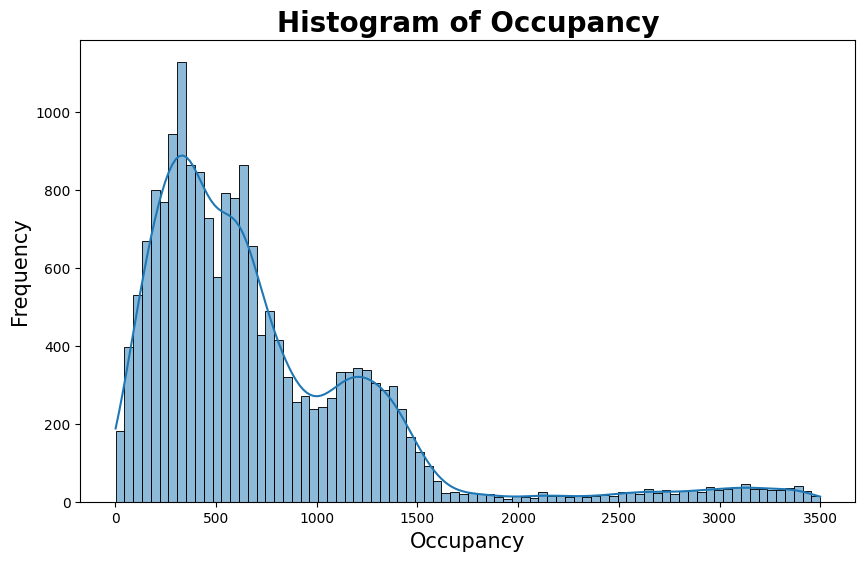

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Occupancy'], kde=True, bins = 80 ,color = 'tab:blue')
plt.title('Histogram of Occupancy', fontweight='bold', fontsize=20)
plt.xlabel('Occupancy',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

##  **Time-wise daily Average Occupancy Rate Analysis accross whole city**

Here we analyze how the **average occupancy rate** changes across different times of the day by performing the following steps:

1. **Group by Time of Day**  
   We use the `Time` column (which is `LastUpdatedTime`) to group data points that occurred at the same time (regardless of date). For each time slot, we compute the **mean occupancy rate** across all days.

2. **Smoothing the Curve**  
   To observe long-term patterns and reduce noise, we apply a **rolling average with a window of 10 time points**. This helps in identifying general trends in parking demand without being distracted by random fluctuations.

3. **Visualization**  
   - The **blue line with markers** shows the raw average occupancy rate at each time.
   - The **red line** represents the smoothed curve, which better highlights peak and off-peak hours.




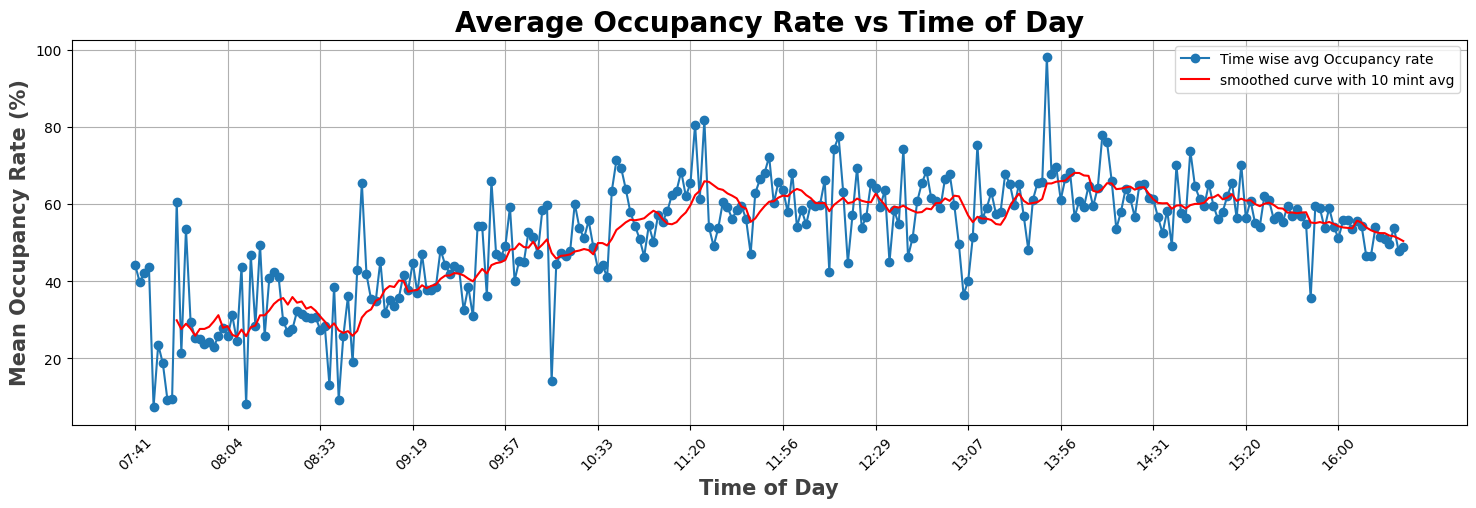

In [ ]:
# Group and compute mean occupancy rate by time
occ_rate_by_time = df.groupby('Time')['Occ_rate'].mean()

# Convert datetime.time → string like "08:30"
occ_rate_by_time.index = occ_rate_by_time.index.map(lambda x: x.strftime('%H:%M'))

# smoothed the curve using 10 minutes of window to reduce noise in the data
smothed_occ_rate = occ_rate_by_time.rolling(window=10).mean()

# Plot
plt.figure(figsize=(18, 5))
plt.plot(occ_rate_by_time.index, occ_rate_by_time.values, marker='o', label = 'Time wise avg Occupancy rate')
plt.plot(smothed_occ_rate.index, smothed_occ_rate.values, color = 'red', label = 'smoothed curve with 10 mint avg')

# Show only every 3rd time label
xticks = occ_rate_by_time.index[::20]
plt.xticks(ticks=xticks, labels=xticks, rotation=45)

plt.xlabel("Time of Day",weight='bold',fontsize=15,alpha=0.75)
plt.ylabel("Mean Occupancy Rate (%)",weight='bold',fontsize=15,alpha=0.75)
plt.title("Average Occupancy Rate vs Time of Day",weight='bold',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

###  Insights from the Plot

-  **Morning Build-up:** The occupancy rate gradually increases from around **08:50 AM**, indicating the start of workday demand.
-  **Peak Period:** The rate seems to **peak between 11:00 AM and 1:59 PM**, which likely corresponds to the busiest hours for parking lots.
-  **Afternoon Drop:** After the peak, the occupancy rate starts declining steadily, reflecting lower usage post-lunch or early departures.
-  **Volatility:** The raw blue line shows significant fluctuations due to daily variations, but the red smoothed curve captures the **general demand trend** effectively.

This kind of temporal occupancy trend is valuable for dynamic pricing

### **Box plot of each vehicle type wise occupancy**

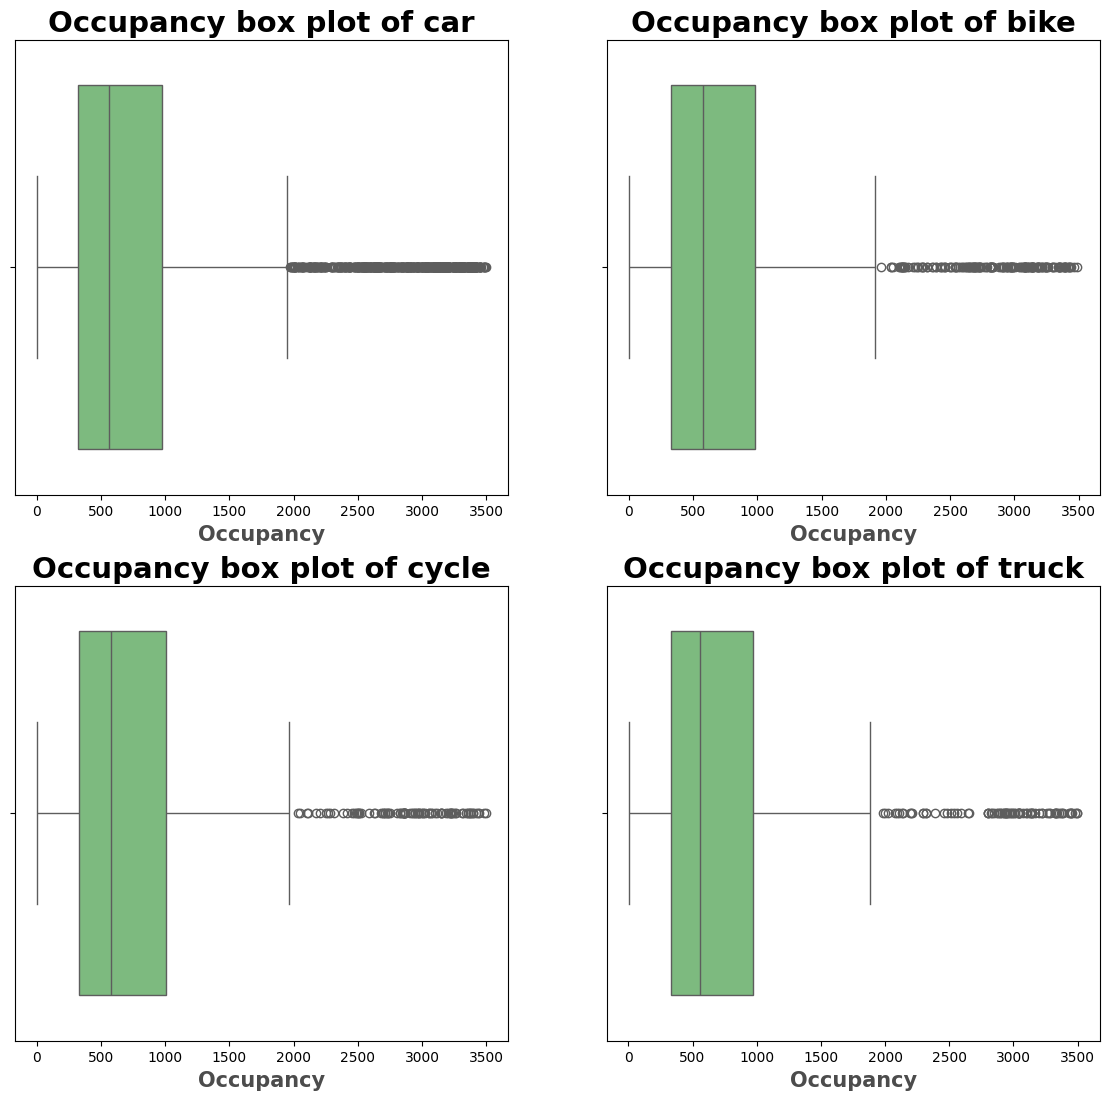

In [ ]:
plt.figure(figsize=(14, 13))
for i,v in enumerate(list(df['Vehicle'].unique())):
  plt.subplot(2,2,i+1)
  sns.boxplot(x = df[df['Vehicle']==v]['Occupancy'],palette='Greens')
  plt.title(f"Occupancy box plot of {v}",fontsize=21,fontweight='bold')
  plt.xlabel('Occupancy',fontsize=15,weight='bold',alpha=0.7)


# **From here we start our real time Modelling with pathway**

In [1]:
!pip install pathway bokeh panel --quiet


In [2]:
import pathway as pw
import pandas as pd
import numpy as np
import datetime
import bokeh.plotting
import panel as pn

###  Define Schema

In [4]:
class ParkingSchema(pw.Schema):
    Timestamp: str
    SystemCodeNumber: str
    Occupancy: int
    Capacity: int
    QueueLength: int
    Traffic: str
    IsSpecialDay: int
    Vehicle: str
    nearest_system: str


## Load CSV as Streaming Data

In [5]:
data = pw.demo.replay_csv(
    "parking_stream.csv",
    schema=ParkingSchema,
    input_rate=200
)


##  Parse Timestamp

In [6]:
fmt = "%Y-%m-%d %H:%M:%S"

# Add new columns to the data stream:
# - 't' contains the parsed full datetime
# - 'day' extracts the date part and resets the time to midnight (useful for day-level aggregations)
data_with_time = data.with_columns(
    t = data.Timestamp.dt.strptime(fmt),
    day = data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
)

## Feature Engineering in Real Time

### 🔹 Step 1: Create `Occ_rate` Feature
We compute a new column `Occ_rate` as:
`Occ_rate = data_with_time.Occupancy / data_with_time.Capacity`

In [7]:
# Create Occ_rate first
data_feat = data_with_time.with_columns(
    Occ_rate = data_with_time.Occupancy / data_with_time.Capacity
)

This feature indicates **how full a parking lot is**, normalized between 0 and 1.  
It will serve as a key signal in our pricing model.

---

### 🔹 Step 2: Apply Tumbling Window over Real-Time Stream

We create **fixed-size 35-minute tumbling windows** for each parking lot per day using:
```python
instance = SystemCodeNumber + "_" + day


In [10]:
import datetime

windowed = data_feat.windowby(
    pw.this.t,
    instance = pw.this.SystemCodeNumber + "_" + pw.this.day,
    window = pw.temporal.tumbling(datetime.timedelta(minutes=35)),
    behavior = pw.temporal.exactly_once_behavior()
).reduce(
    t = pw.this._pw_window_end,

    # Retain grouping keys for later joins
    SystemCodeNumber = pw.reducers.argmax(pw.this.t, pw.this.SystemCodeNumber),
    day = pw.reducers.argmax(pw.this.t, pw.this.day),

    # Demand rate calculation
    earliest_occ = pw.reducers.earliest(pw.this.Occupancy),
    t_start = pw.reducers.earliest(pw.this.t),
    latest_occ = pw.reducers.argmax(pw.this.t, pw.this.Occupancy),       # ✅ deletion-safe latest

    # Volatility
    occ_max = pw.reducers.max(pw.this.Occupancy),
    occ_min = pw.reducers.min(pw.this.Occupancy),

    # Other lot-specific features
    cap = pw.reducers.max(pw.this.Capacity),
    queue = pw.reducers.argmax(pw.this.t, pw.this.QueueLength),
    traffic = pw.reducers.argmax(pw.this.t, pw.this.Traffic),
    special = pw.reducers.argmax(pw.this.t, pw.this.IsSpecialDay),
    vehicle = pw.reducers.argmax(pw.this.t, pw.this.Vehicle),
    occ_rate = pw.reducers.argmax(pw.this.t, pw.this.Occ_rate)           # ✅ also simulated latest
)


/tmp/ipython-input-10-3144787018.py:8: UserWarning: earliest reducer uses processing time to choose elements while windowby uses data time to assign entries to windows. Maybe it is not the behavior you want. To choose elements according to their data time, you may use min reducer.
  ).reduce(


| Feature        | Description                                                        |
| -------------- | ------------------------------------------------------------------ |
| `earliest_occ` | Occupancy at the start of the window (for demand rate calc)        |
| `latest_occ`   | Occupancy at the end of the window (deletion-safe using `argmax`)  |
| `t_start`, `t` | Start and end timestamps of the window                             |
| `occ_rate`     | Occupancy rate at the end of the window (`argmax` used for safety) |
| `occ_max/min`  | Maximum and minimum occupancy in window (volatility indicator)     |
| `cap`          | Max capacity in the window (should be constant per lot)            |
| `queue`        | Queue length at latest timestamp in window                         |
| `traffic`      | Traffic level at latest timestamp                                  |
| `special`      | Special day indicator at latest timestamp                          |
| `vehicle`      | Type of vehicle at latest timestamp                                |


## **Final Pricing Logic Code (Model 1)**
### Dynamic Pricing Model 1:
**Formula:**

 `price = base_price + α * Occ_rate + demand_rate`

**Explanation:**
- occ_rate: Current occupancy % (how full the lot is)
- demand rate - Change in occupancy in a 35-min window
- cap: Normalizing factor to keep pricing in consistent scale

**Where:**
- `base_price = 10`
- `Occ_rate = Occupancy / Capacity`
- `demand_rate = (latest_occ - earliest_occ) / 35`  ⬅️
- `α = 0.5` (weight for Occ_rate)
- `price` was capped between ₹8 and ₹20 for stability.

In [11]:
alpha = 0.5
base_price = 10
demand_rate = (pw.this.latest_occ - pw.this.earliest_occ) / 35
# the more volatile the demand is, indicating potential scarcity.
Price_model1 = windowed.with_columns(
    price = base_price + alpha * pw.this.occ_rate + demand_rate
    #+ (pw.this.occ_max - pw.this.occ_min) / pw.this.cap # Demand volatility adjustment-> more tha fluctuation more the volatility
)




In [13]:
# Activate the Panel extension to enable interactive visualizations
pn.extension()

def price_plotter(source):
    fig = bokeh.plotting.figure(
        height=400,
        width=800,
        title="Pathway: Real-Time Parking Price",
        x_axis_type="datetime"
    )
    # Plot a line graph showing how the price evolves over time
    fig.line("t", "price", source=source, line_width=2, color="green")

    # Overlay red circles at each data point for better visibility
    fig.circle("t", "price", source=source, size=6, color="red")
    return fig

#  create the visualization:
# - 'price_plotter' is the rendering function
# - 'sorting_col="t"' ensures the data is plotted in time order
viz = Price_model1.plot(price_plotter, sorting_col="t")

#Serve the Panel app
pn.Column(viz).servable()


Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

## 📈 Model 1 Price Behavior — Insights & Interpretation


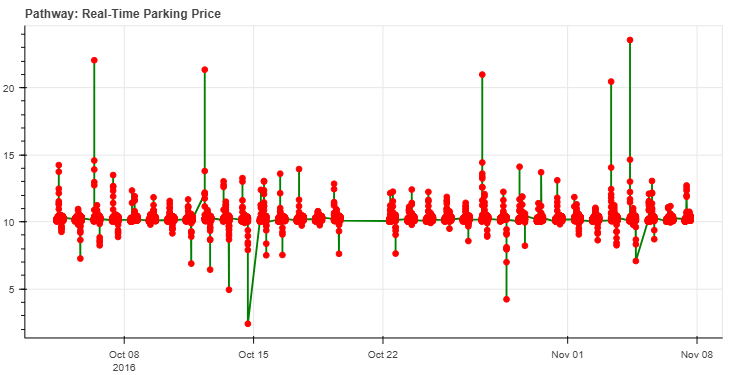

### 🔍 Plot 1: Full Range (as in the fig)- *October 4 to November 7*

- 🔺 Price spikes up to **₹21+** on high-demand windows (likely peak hours)
- 🔻 Price dips down to **₹5-₹6** during idle or reverse demand
-  Most prices are stable around **₹10-₹14**
-  Some sharp drops are **negative demand_rate effects** (vacating lots)
- Pricing remains smooth and reactive overall

---

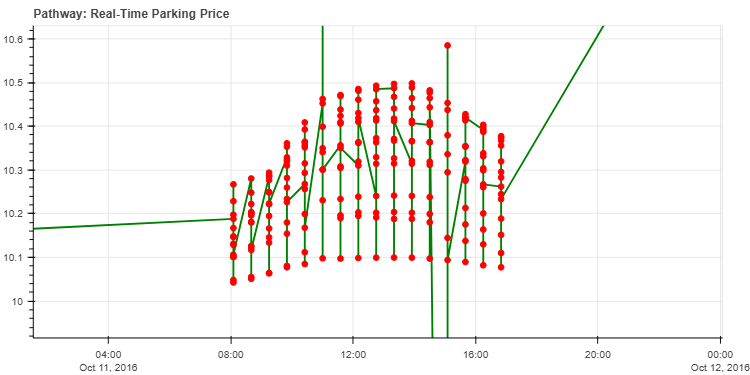

###  Plot 2: Specific Day - *October 11, 2016*

-  Price steadily increased from **~₹10.1 to ₹10.5+** during **morning to noon**
-  Reflected increased lot usage as people arrived for work/school
-  Fell slightly in the evening as demand dropped
-  Shows **natural demand curve** behavior — aligned with real-world patterns
- same vertical line has multiple point shows other System Number or parking space

---

###  Verdict:

| Aspect           | Evaluation                               |
|------------------|------------------------------------------|
| Responsiveness   |  Captures both rising and falling demand |
| Stability        |  Mostly smooth, spikes are explainable   |
| Interpretability |  Easy to understand from features        |
| Realism          |  Behaves like a real-world pricing engine|




## Run the pathway
#### Start the Pathway pipeline

In [ ]:
pw.run()

Output()

In [16]:
print(Price_model1.schema)


id                                                                                           | t               | SystemCodeNumber | day | earliest_occ | t_start         | latest_occ | occ_max | occ_min | cap | queue | traffic | special | vehicle | occ_rate | price
Pointer(Tuple(STR, DATE_TIME_NAIVE, DATE_TIME_NAIVE), DATE_TIME_NAIVE, DATE_TIME_NAIVE, STR) | DATE_TIME_NAIVE | STR              | STR | INT          | DATE_TIME_NAIVE | INT        | INT     | INT     | INT | INT   | STR     | INT     | STR     | FLOAT    | FLOAT


### clearing github problem
*There was an error rendering your Notebook: the 'state' key is missing from 'metadata.widgets'. Add 'state' to each, or remove 'metadata.widgets'.
Using nbformat v5.10.4 and nbconvert v7.16.6*

In [17]:
!pip install nbstripout
!nbstripout Dynamic_Pricing_Model_1.ipynb


Could not strip 'Dynamic_Pricing_Model_1.ipynb': file not found


In [25]:
from google.colab import files
uploaded = files.upload()


Saving Dynamic_Pricing_Model_1.ipynb to Dynamic_Pricing_Model_1.ipynb


In [26]:
import json

# Update this with your uploaded notebook filename
ruta = "Dynamic_Pricing_Model_1.ipynb"

# Load the notebook as JSON
with open(ruta, "r", encoding="utf-8") as f:
    data = json.load(f)

# Clean up broken widgets metadata
if "widgets" in data.get("metadata", {}):
    print("Removing metadata.widgets...")
    del data["metadata"]["widgets"]

# Save the cleaned notebook
with open(ruta, "w", encoding="utf-8") as f:
    json.dump(data, f, indent=1)

print("Notebook cleaned and saved.")


Removing metadata.widgets...
Notebook cleaned and saved.


In [28]:
files.download("Dynamic_Pricing_Model_1.ipynb")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>